<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/veronica-thesis/blob/master/malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
from tensorflow.keras.utils import Sequence
#from tensorflow.python.keras.utils import data_utils
import math
import os
import pandas
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv3D,Conv2D,InputLayer,MaxPooling3D,Dropout,Flatten,MaxPooling2D,BatchNormalization,LayerNormalization


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Read the data from directory

The data are the original code converted to images and then resized to 256x256.
There are different sets
1. Containing the first 2000 images
1. Containing the first 4000 images
1. Containing the first 6000 images
1. Containing the first 80000 images

The test images are always the same 868 images which are different from all the above sets.

In [2]:
image_size=(256,256)
dir="data/resized/"
dataset=tf.keras.preprocessing.image_dataset_from_directory(dir+"train",batch_size=32,image_size=image_size,
                                                            shuffle=True,color_mode="grayscale")
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(dir+"test",batch_size=32,image_size=image_size,
                                                            shuffle=False,color_mode="grayscale")

Found 9000 files belonging to 9 classes.
Found 1868 files belonging to 9 classes.


## Build the model

In [3]:
def createModelYuan():
    
    model = Sequential()
    model.add(InputLayer(input_shape=(256,256,1)))
    #model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
   
    model.add(Conv2D(64, kernel_size = (3,3),strides=(1,1), padding='same',activation = 'relu'))
    model.add(Conv2D(64, kernel_size = (3,3),strides=(1,1), padding='same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(128, kernel_size = (3,3),strides=(1,1), padding='same',activation = 'relu'))
    model.add(Conv2D(128, kernel_size = (3,3),strides=(1,1), padding='same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    

    model.add(Conv2D(256, kernel_size = (3,3),strides=(1,1), padding='same',activation = 'relu'))
    model.add(Conv2D(256, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(Conv2D(256, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))


    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1),padding='same',activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))


    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(9, activation = 'softmax', name = 'Output'))
    return model


### Instantiate the model

In [4]:

model=createModelYuan()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

## Optimization

Keras can use many optimization method. In this notebook we use the __Adam__ method which can be described loosely as __adaptive__ gradient descent.

Also since the labels are __NOT__ in one_hot_encoding we use the "Sparse" version of the crossentropy loss: __SparseCategoricalCrossentropy__. Finally, if we don't specify from_logits=False then the loss function would compute softwmax before computing the loss. Since we are computing softwmax in our model already we turn this step off by specifying from_logits=False

In [5]:
# if we don't use softmax in the last layer, i.e. if the output of the
# model is NOT probabilities then use from_logits=True

# where the weights are saved periodically 
filepath="checkpoints/cp-{epoch}.ckpt"
cb=tf.keras.callbacks.ModelCheckpoint(filepath,save_weights_only=True,save_freq='epoch',verbose=0)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

latest = tf.train.latest_checkpoint("checkpoints")
model.load_weights(latest)
history=model.fit(dataset,callbacks=[cb],epochs=10)


Epoch 1/10
282/282 [==============================] - 273s 900ms/step - loss: 0.0692 - accuracy: 0.9819
Epoch 2/10
282/282 [==============================] - 1125s 4s/step - loss: 0.1886 - accuracy: 0.9711
Epoch 3/10
282/282 [==============================] - 211s 746ms/step - loss: 0.1682 - accuracy: 0.9510
Epoch 4/10
282/282 [==============================] - 221s 782ms/step - loss: 0.0400 - accuracy: 0.9855
Epoch 5/10
282/282 [==============================] - 223s 791ms/step - loss: 0.0227 - accuracy: 0.9926
Epoch 6/10
282/282 [==============================] - 223s 789ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 7/10
282/282 [==============================] - 222s 786ms/step - loss: 0.0330 - accuracy: 0.9906
Epoch 8/10
282/282 [==============================] - 222s 785ms/step - loss: 0.0321 - accuracy: 0.9911
Epoch 9/10
282/282 [==============================] - 225s 798ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 10/10
282/282 [==============================] - 228s 810ms/

### Testing the Accuracy

In [6]:

_,test_accuracy=model.evaluate(test_dataset)

59/59 [==============================] - 21s 353ms/step - loss: 0.1477 - accuracy: 0.9711


In [7]:
probabilities=model.predict(test_dataset)
predictions=np.argmax(probabilities,axis=1)


In [8]:
y = np.concatenate([y for x, y in test_dataset], axis=0)


In [9]:
m=tf.math.confusion_matrix(y,predictions)

In [ ]:
m

In [10]:
import seaborn as sb
sum(m)

TypeError: 'axis' is an invalid keyword argument for sum()

In [12]:
m/sum(m)

<tf.Tensor: shape=(9, 9), dtype=float64, numpy=
array([[1.        , 0.        , 0.        , 0.        , 0.00446429,
        0.00374532, 0.        , 0.        , 0.00813008],
       [0.        , 0.98876404, 0.00487805, 0.00207039, 0.00446429,
        0.00374532, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.9902439 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.97929607, 0.01339286,
        0.00374532, 0.        , 0.00793651, 0.        ],
       [0.        , 0.        , 0.00487805, 0.00414079, 0.95535714,
        0.03745318, 0.        , 0.        , 0.01626016],
       [0.        , 0.        , 0.        , 0.00621118, 0.00892857,
        0.91385768, 0.        , 0.00793651, 0.00813008],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00374532, 1.        , 0.        , 0.        ],
       [0.        , 0.01123596, 0.        , 0.00621118, 0.00892857,
        0

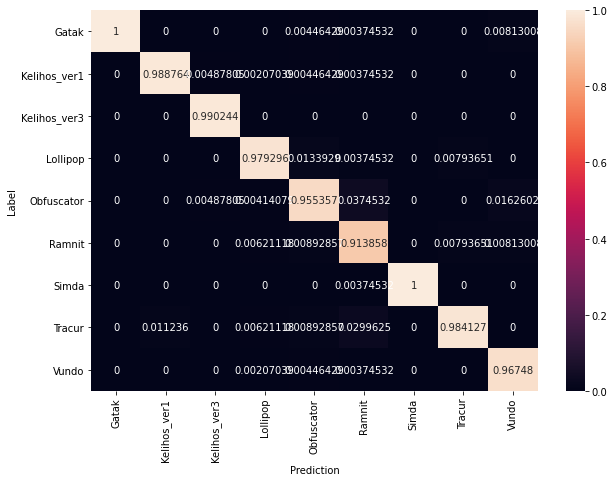

In [11]:
plt.figure(figsize=(10, 7))
sb.heatmap(m/sum(m), xticklabels=dataset.class_names, yticklabels=dataset.class_names, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()